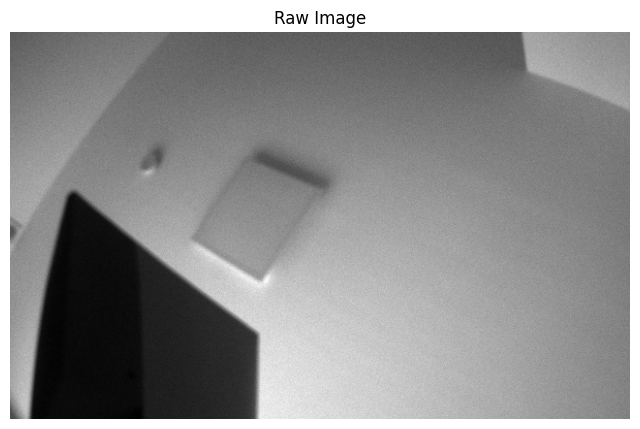

In [1]:
import bmemcached
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Connect to Memcached
# MEMCACHED_SERVER = "localhost:11211"  # Change this to your server
MEMCACHED_SERVER = "/var/run/memcached/memcached.sock"  # Change this to your server
client = bmemcached.Client((MEMCACHED_SERVER))

timestamp = "1739192104400"  # Replace with actual timestamp key

# Retrieve the BMP image from Memcached
bmp_data = client.get(timestamp)
if bmp_data:
    # Convert the binary data into a NumPy array
    np_arr = np.frombuffer(bmp_data, dtype=np.uint8)

    # Decode the image from BMP format
    raw_image = cv2.imdecode(np_arr, cv2.IMREAD_UNCHANGED)
    raw_image = raw_image.reshape(400, 640)

    # Plot the raw image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(raw_image, cmap='gray')  # Display normalized image with 'gray' colormap
    plt.axis('off')  # Turn off axis numbers/ticks
    plt.title('Raw Image')
    plt.show()
else:
    print(f"No data found in Memcached for key: {timestamp}")

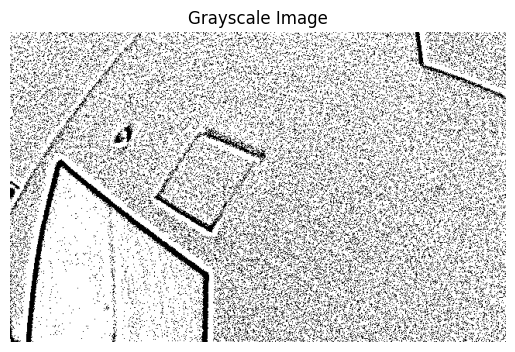

In [2]:
import cv2

# Perform adaptive thresholding
thresh_img = cv2.adaptiveThreshold(raw_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)
plt.imshow(thresh_img, cmap='gray')  # Show image in grayscale colormap
plt.title('Grayscale Image')
plt.axis('off')  # Hide axes
plt.show()